<a href="https://colab.research.google.com/github/Fernando-Jaimes/DeepLearning_LinearRegression/blob/main/homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch [10/100], Pérdida: 0.6821
Epoch [20/100], Pérdida: 0.5507
Epoch [30/100], Pérdida: 0.5448
Epoch [40/100], Pérdida: 0.5431
Epoch [50/100], Pérdida: 0.5406
Epoch [60/100], Pérdida: 0.5379
Epoch [70/100], Pérdida: 0.5352
Epoch [80/100], Pérdida: 0.5326
Epoch [90/100], Pérdida: 0.5301
Epoch [100/100], Pérdida: 0.5278
Pérdida final en prueba: 0.4331


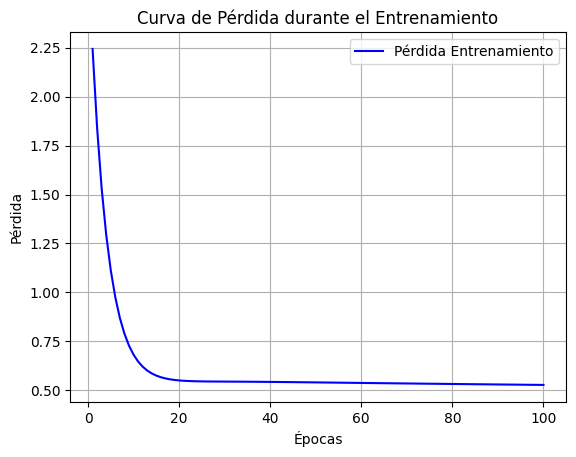

In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt

# 1. Cargar el dataset desde el CSV
file_path = 'Diagnostico.csv'  # Asegúrate de subirlo a Colab y usar la ruta correcta
with open(file_path, 'r', encoding='utf-8') as file:
    reader = csv.reader(file, delimiter=';')
    header = next(reader)
    data = [row for row in reader]

# Verificar columnas
expected_columns = len(header)
data = [row for row in data if len(row) == expected_columns]

# Convertir datos a valores numéricos
def convert_to_numeric(value):
    try:
        return float(value.replace(',', '.'))
    except ValueError:
        if value.upper() == 'MASCULINO':
            return 1.0
        elif value.upper() == 'FEMENINO':
            return 0.0
        return np.nan  # Marcar valores inesperados como NaN

# Convertir dataset a numpy
numeric_data = np.array([[convert_to_numeric(value) for value in row] for row in data], dtype=np.float64)

# Eliminar filas con valores NaN (si hay errores en el CSV)
numeric_data = numeric_data[~np.isnan(numeric_data).any(axis=1)]

# Verificar si 'EVOLUCION' está en el header
column_name = 'EVOLUCION'
if column_name not in header:
    raise ValueError(f"La columna '{column_name}' no se encuentra en el encabezado del CSV. Encabezado: {header}")

# Separar características (X) y etiquetas (y)
y_index = header.index(column_name)
X = np.delete(numeric_data, y_index, axis=1)
y = numeric_data[:, y_index].reshape(-1, 1)

# Escalar datos para evitar valores extremos
X = X / np.max(np.abs(X), axis=0)

def check_nan_inf(array, name):
    if np.isnan(array).any() or np.isinf(array).any():
        raise ValueError(f"{name} contiene NaN o valores infinitos.")

check_nan_inf(X, "X")
check_nan_inf(y, "y")

# División del dataset (80/20) sin aleatorización
X_train, X_test = X[:354], X[354:]
y_train, y_test = y[:354], y[354:]

# 4. Implementar modelo de regresión lineal manualmente
class LinearRegression:
    def __init__(self, input_dim, learning_rate=0.001, batch_size=32):
        self.weights = np.random.randn(input_dim, 1) * 0.01  # Inicialización estable
        self.bias = 0.0
        self.learning_rate = learning_rate
        self.batch_size = batch_size

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

    def compute_loss(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    def train(self, X_train, y_train, epochs=100):
        n = len(y_train)
        loss_history = []

        for epoch in range(epochs):
            for i in range(0, n, self.batch_size):
                X_batch = X_train[i:i+self.batch_size]
                y_batch = y_train[i:i+self.batch_size]

                y_pred = self.predict(X_batch)

                # Gradientes
                gradient_w = -(2 / len(y_batch)) * np.dot(X_batch.T, (y_batch - y_pred))
                gradient_b = -(2 / len(y_batch)) * np.sum(y_batch - y_pred)

                # Actualización de pesos
                self.weights -= self.learning_rate * gradient_w
                self.bias -= self.learning_rate * gradient_b

            loss = self.compute_loss(y_train, self.predict(X_train))
            loss_history.append(loss)

            if (epoch + 1) % 10 == 0:
                print(f'Epoch [{epoch+1}/{epochs}], Pérdida: {loss:.4f}')

        return loss_history

# Entrenar modelo
model = LinearRegression(X_train.shape[1], learning_rate=0.001, batch_size=32)
loss_history = model.train(X_train, y_train, epochs=100)

# Evaluación
y_pred = model.predict(X_test)
loss = model.compute_loss(y_test, y_pred)
print(f'Pérdida final en prueba: {loss:.4f}')

# Graficar la pérdida
epochs = range(1, 101)
plt.plot(epochs, loss_history, label='Pérdida Entrenamiento', color='blue')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Curva de Pérdida durante el Entrenamiento')
plt.legend()
plt.grid()
plt.show()

# Guardar el modelo
np.savez('linear_regression_model.npz', weights=model.weights, bias=model.bias)
